In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import stdev 
from matplotlib.lines import Line2D
import numpy as np

import math

from os import listdir
from os.path import isfile, isdir, join

In [2]:
def ticks(LL, UL, step):
    lst=[round(i*step,4)+LL for i in range(0,int((UL-LL)/step+0.5))]
    lst.append(UL)
    return lst

In [3]:
def file_filter(subfile='xlsm'):
    path = "/Users/luxshare-ict/Documents/Python/Lineplot"
    file = listdir(path)
    
    files=[]
    for fl in file:
        if fl.split(".")[-1]==subfile:
            if fl[0]!='~':
                files.append(fl)
    return files

In [4]:
#Original DataFrame: df

df=pd.read_csv(file_filter(subfile='csv')[0],header=1)
#df[0:7]

In [46]:
df['tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.250000GHz'].iloc[3]

-2.31

In [5]:
#Modified DataFrame: ddf(remove spec raws)

ddf=pd.concat([df[2:3].fillna('_USL'),df[3:4].fillna('_LSL')])
ddf=pd.concat([ddf,df[5:]])

#ddf

In [6]:
for i in ddf['Special Build Description'].index:
    try:
        ddf['Special Build Description'][i].split('_')
    except:
        ddf.drop(index=i,inplace=True)

In [7]:
try:
    ddf['Config']=ddf['Special Build Description'].apply(lambda r: r.split('_')[1])
except:
    ddf['Config']=ddf['Special Build Description'].apply(lambda r: r.replace(' ',""))
ddf.head()

,Site,Product,SerialNumber,Unnamed: 3,BUILD_MATRIX_CONFIG,Special Build Description,Unit Number,backup,Station ID,Test Pass/Fail Status,...,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.200000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz,Config
2,Upper Limit ----->,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,...,2.990000,1.130000,2.170000,3.440000,2.750000,2.910000,2.060000,3.080000,3.630000,_USL
3,Lower Limit ----->,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,...,-3.010000,-4.870000,-3.830000,-2.560000,-3.250000,-3.090000,-3.940000,-2.920000,-2.370000,_LSL
5,JSIT,N210,GPXLKQ66N9,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBC-R56as-f,NaN,ITJS_A01-2FAS-07_5_RF-OTA-3,PASS,...,0.108887,-1.604767,-1.981995,-0.010284,-0.887344,-0.401260,-1.226807,2.005432,3.169373,EVT-4-S_WRQH2009
6,JSIT,N210,NLWXVL4DNV,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBW-G03ar-f,NaN,ITJS_A01-2FAS-07_7_RF-OTA-3,PASS,...,-0.011002,-1.414993,-1.666641,-0.503403,-0.961792,-0.456940,-0.746246,2.102661,2.911942,EVT-4-S_WRQH2009
7,JSIT,N210,HG70KR7QF4,Others,"Online,Others,EVT-4-S",Others,LE2D-DVT-ENG-Main_LBW-G10ar-f,NaN,ITJS_A01-2FAS-07_6_RF-OTA-3,PASS,...,0.819214,-1.129807,0.188263,1.599976,0.971085,1.531082,0.779205,2.306442,2.825134,Others


In [8]:
''

''

In [9]:
def Config_finding(Clist, UserList):
    CClist=[]
    if UserList=='n':
        return ''
    else:
        for i in Clist:
            for a in UserList:
                try:
                    if a in i:
                        CClist.append(i)
                except:
                    continue
        return CClist

In [10]:
class Test_List:
    def __init__(self,test_list):
        self.test_list=test_list

In [11]:
AOI=Test_List(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12'])

AOTA_EIRP=Test_List(['tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.250000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.300000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.350000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.400000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.450000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.500000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.550000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.600000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.650000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.700000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=6.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=7.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=7.800000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=7.850000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=7.900000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=7.950000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.000000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.050000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.100000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.150000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.200000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=EIRP_Corrected ant=ant_0:freq=8.250000GHz'])

AOTA_PRAD=Test_List(['tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.250000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.300000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.350000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.400000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.450000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.500000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.550000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.600000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.650000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.700000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.800000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.850000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.900000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.950000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.000000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.050000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.100000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.150000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.200000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.250000GHz'])

WIFI_Omnia=Test_List(['tcPRAD:sstcCompensated tBT:stcFF condNA:tp1:sp0:ant1:f2402:pwr9.5:bw1:r3-DH5:dl-67.5',
 'tcPRAD:sstcCompensated tBT:stcFF condNA:tp1:sp0:ant1:f2441:pwr9.5:bw1:r3-DH5:dl-67.5',
 'tcPRAD:sstcCompensated tBT:stcFF condNA:tp1:sp0:ant1:f2480:pwr9.5:bw1:r3-DH5:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f2412:pwr15.5:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f2442:pwr15.5:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f2472:pwr15.5:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5180:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5260:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5320:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5500:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5580:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5600:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5660:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5700:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5745:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5785:pwr14:bw1:rCW:dl-67.5',
 'tcPRAD:sstcCompensated tWLAN:stcFF condNA:tp1_20:sp0:ant1:f5825:pwr14:bw1:rCW:dl-67.5'])

AOTA_PRAD_Bas=Test_List(['tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.250000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.350000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.500000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.550000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.650000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=6.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.850000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=7.900000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.000000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.150000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.200000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected ant=ant_0:freq=8.250000GHz'])

WIFI_Omnia_MP=Test_List(["tcPRAD:sstcCompensated tBT:stcFF Om0:condNA:tp1:sp0:ant1:f2402:pwr9.5:bw1:r3-DH5:dl-67.5",
"tcPRAD:sstcCompensated tBT:stcFF Om0:condNA:tp1:sp0:ant1:f2441:pwr9.5:bw1:r3-DH5:dl-67.5",
"tcPRAD:sstcCompensated tBT:stcFF Om0:condNA:tp1:sp0:ant1:f2480:pwr9.5:bw1:r3-DH5:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f2412:pwr15.5:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f2442:pwr15.5:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f2472:pwr15.5:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5180:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5260:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5320:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5500:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5580:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5600:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5660:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5700:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5745:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5785:pwr14:bw1:rCW:dl-67.5",
"tcPRAD:sstcCompensated tWLAN:stcFF Om0:condNA:tp1_20:sp0:ant1:f5825:pwr14:bw1:rCW:dl-67.5"])

AOTA_MP=Test_List(["tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.250000GHz",

"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.350000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.500000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz",

"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz",

"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz",

"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz"])

AOTA_MP111=Test_List(["tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.250000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.300000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.350000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.500000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.650000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.800000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.100000GHz",
"tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz"])

Cell_OTA=Test_List(["tcTPsstcPOST tLTEbB1c18050tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB1c18300tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB1c18549tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB2c18650tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB2c18903tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB2c19149tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB3c19250tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB3c19574tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB3c19899tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB4c20001tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB4c20175tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB4c20350tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB7c20800tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB7c21100tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB7c21400tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB25c26091tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB25c26365tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB25c26640tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB39c38300tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB39c38450tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB39c38600tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB40c38700tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB40c39000tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB40c39300tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB41c39700tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB41c40620tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB41c41539tpMXstcPRAD cdL-WI-2000d0a1dl-80mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB66c132322tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2",
"tcTPsstcPOST tLTEbB66c132622tpMXstcPRAD cdL-WI-2000d0a1dl-70mLMg-1ur1-25dr50-0bw10sb-1up2dp2"])

FCM2HSG_Gap=Test_List(['Gap FCM to Hsg (P)',
 'Gap FCM to Hsg (A)',
 'Gap FCM to Hsg (B)',
 'Gap FCM to Hsg (C)',
 'Gap FCM to Hsg (D)',
 'Gap FCM to Hsg (E)',
 'Gap FCM to Hsg (F)',
 'Gap FCM to Hsg (G)',
 'Gap FCM to Hsg (H)',
 'Gap FCM to Hsg (I)',
 'Gap FCM to Hsg (J)',
 'Gap FCM to Hsg (K)',
 'Gap FCM to Hsg (L)',
 'Gap FCM to Hsg (M)',
 'Gap FCM to Hsg (N)',
 'Gap FCM to Hsg (O)'])

FCM2HSG_Z=Test_List(['Z- subflush  FCM to Hsg Turret (P)',
 'Z- subflush  FCM to Hsg Turret (A)',
 'Z- subflush  FCM to Hsg Turret (B)',
 'Z- subflush  FCM to Hsg Turret (C)',
 'Z- subflush  FCM to Hsg Turret (D)',
 'Z- subflush  FCM to Hsg Turret (E)',
 'Z- subflush  FCM to Hsg Turret (F)',
 'Z- subflush  FCM to Hsg Turret (G)',
 'Z- subflush  FCM to Hsg Turret (H)',
 'Z- subflush  FCM to Hsg Turret (I)',
 'Z- subflush  FCM to Hsg Turret (J)',
 'Z- subflush  FCM to Hsg Turret (K)',
 'Z- subflush  FCM to Hsg Turret (L)',
 'Z- subflush  FCM to Hsg Turret (M)',
 'Z- subflush  FCM to Hsg Turret (N)',
 'Z- subflush  FCM to Hsg Turret (O)'])

In [12]:
if 'DEVELOPMENT33' in file_filter(subfile='csv')[0]:
    Plot_type='2'
elif 'DEVELOPMENT32' in file_filter(subfile='csv')[0]:
    Plot_type='5'
elif 'AE-57' in file_filter(subfile='csv')[0]:
    Plot_type='1'
elif 'DEVELOPMENT44' in file_filter(subfile='csv')[0]:
    Plot_type='8'    
else:
    Plot_type=input('AOI[1], Wifi_Omnia[2], AOTA_EIRP[3], AOTA_PRAD[4], AOTA_PRAD_Bas[5], WIFI_Omnia_MP[6], AOTA_MP[7],Cell_OTA[8] \n FCM2HSG_Gap[9], FCM2HSG_Z[10] \n')

AOI[1], Wifi_Omnia[2], AOTA_EIRP[3], AOTA_PRAD[4], AOTA_PRAD_Bas[5], WIFI_Omnia_MP[6], AOTA_MP[7],Cell_OTA[8] 
 FCM2HSG_Gap[9], FCM2HSG_Z[10] 
7


In [13]:
if Plot_type=='1':
    test_list=AOI.test_list
elif Plot_type=='2':
    test_list=WIFI_Omnia.test_list    
elif Plot_type=='3':
    test_list=AOTA_EIRP.test_list
elif Plot_type=='4':
    test_list=AOTA_PRAD.test_list
elif Plot_type=='5':
    test_list=AOTA_PRAD_Bas.test_list    
elif Plot_type=='6':
    test_list=WIFI_Omnia_MP.test_list    
elif Plot_type=='7':
    test_list=AOTA_MP.test_list    
elif Plot_type=='8':
    test_list=Cell_OTA.test_list    
elif Plot_type=='9':
    test_list=FCM2HSG_Gap.test_list 
elif Plot_type=='10':
    test_list=FCM2HSG_Z.test_list

In [14]:
test_list

['tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.250000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.350000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.500000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz',
 'tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz']

In [15]:
#test_list[0].split("tLTEb")[1].split("tpMX")[0]

In [16]:
def Plotout(ddf,Catagory,i,color_list,linewid=6):
    
    data_df=ddf[ddf[Catagory]==i][[Catagory]+test_list].set_index(Catagory).T
    
    #print(len(data_df))
    for j in range(0,len(list(data_df))):
        try:
            #print(i)
            plot_df=data_df.iloc[:,j].reset_index()
            plot_df[i]=plot_df[i].apply(lambda r: float(r))
            w=sns.lineplot(data=plot_df,x='index',y=i,color=color_list,linewidth=linewid, legend=True)
        except:
            print('Error')
            continue
    
    return data_df

In [17]:
class Inquiry_Info:
    def __init__(self,Catagory, Catagory_lst, color,width):
        self.Catagory=Catagory
        self.Catagory_lst=Catagory_lst
        self.lineC=color
        self.lineW=width

In [18]:
ddf

,Site,Product,SerialNumber,Unnamed: 3,BUILD_MATRIX_CONFIG,Special Build Description,Unit Number,backup,Station ID,Test Pass/Fail Status,...,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.200000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz,Config
2,Upper Limit ----->,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,...,2.990000,1.130000,2.170000,3.440000,2.750000,2.910000,2.060000,3.080000,3.630000,_USL
3,Lower Limit ----->,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,...,-3.010000,-4.870000,-3.830000,-2.560000,-3.250000,-3.090000,-3.940000,-2.920000,-2.370000,_LSL
5,JSIT,N210,GPXLKQ66N9,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBC-R56as-f,NaN,ITJS_A01-2FAS-07_5_RF-OTA-3,PASS,...,0.108887,-1.604767,-1.981995,-0.010284,-0.887344,-0.401260,-1.226807,2.005432,3.169373,EVT-4-S_WRQH2009
6,JSIT,N210,NLWXVL4DNV,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBW-G03ar-f,NaN,ITJS_A01-2FAS-07_7_RF-OTA-3,PASS,...,-0.011002,-1.414993,-1.666641,-0.503403,-0.961792,-0.456940,-0.746246,2.102661,2.911942,EVT-4-S_WRQH2009
7,JSIT,N210,HG70KR7QF4,Others,"Online,Others,EVT-4-S",Others,LE2D-DVT-ENG-Main_LBW-G10ar-f,NaN,ITJS_A01-2FAS-07_6_RF-OTA-3,PASS,...,0.819214,-1.129807,0.188263,1.599976,0.971085,1.531082,0.779205,2.306442,2.825134,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,ITJS,N210,YXP030K095,NaN,"BAS,Others,DVT-4-S",DVT-4-S,"BAS, Others, DVT-4-S",ITJS_A01-2FAS-07_2_DEVELOPMENT32,FAIL,45110.81875,...,-1.275925,-2.402740,-1.163055,-0.542694,-0.207260,-0.462357,-0.836990,-0.509079,-0.665222,DVT-4-S
7102,ITJS,N210,YYPXTTV0MF,NaN,"BAS,Others,EVT-4-S",EVT-4-S,"BAS, Others, EVT-4-S",ITJS_A01-2FAS-07_3_DEVELOPMENT32,FAIL,45113.89583,...,-0.616776,-1.914749,-1.227310,-0.521729,-0.394791,-1.157791,-2.521194,-2.288544,-2.370056,EVT-4-S
7103,ITJS,N210,YYPXTTV0MF,NaN,"BAS,Others,EVT-4-S",EVT-4-S,"BAS, Others, EVT-4-S",ITJS_A01-2FAS-07_3_DEVELOPMENT32,FAIL,45113.90278,...,-0.659958,-1.952881,-1.134949,-0.353439,-0.208008,-0.966324,-2.397736,-2.181000,-2.284134,EVT-4-S
7104,ITJS,N210,YYTWHF41PD,NaN,"BAS,Others,AB-2",AB-2,"BAS, Others, AB-2",ITJS_A01-2FAS-07_2_DEVELOPMENT32,FAIL,45119.09167,...,-2.148834,-3.266586,-0.813095,0.279907,0.781784,0.726761,0.361649,0.575195,0.457031,AB-2


In [19]:
Spec=Inquiry_Info('Config',
                  ['_USL','_LSL'],
                  ['#B51700'],
                  10)

In [20]:
Spec.Catagory

'Config'

In [21]:
Spec.Catagory_lst

['_USL', '_LSL']

In [22]:
Clist=list(set(ddf['Config'][2:]))
print('Config List in this Data: ')
sorted(Clist)

Config List in this Data: 


['AB-2',
 'AB-2_WRQH0011',
 'AB-2_WRQH0555',
 'AB-2_WRQH0618',
 'AB-2_WRQH0684',
 'AB-2_WRQH0688',
 'AB-2_WRQH0689',
 'AB-2_WRQH0718',
 'AB-2_WRQH0770',
 'AB-2_WRQH0777',
 'AB-2_WRQH0787',
 'AB-2_WRQH0802',
 'AB-2_WRQH2005',
 'AB-2_WRQH2009',
 'AB-2_WRQH4350',
 'AB-2_WRQH4537',
 'AB-2_WRQH4540',
 'DVT-4-S',
 'DVT-4-S_WRQH0011',
 'DVT-4-S_WRQH0591',
 'DVT-4-S_WRQH0689',
 'DVT-4-S_WRQH0734',
 'DVT-4-S_WRQH0735',
 'DVT-4-S_WRQH2005',
 'DVT-4-S_WRQH2009',
 'EVT-4-S',
 'EVT-4-S_WRQH0011',
 'EVT-4-S_WRQH2009',
 'Others']

In [23]:
User=input("Input Config List: \n").split(" ")
if User==[""]:
    c_list=User
else:
    c_list=Config_finding(Clist,User)

Config_Select=Inquiry_Info('Config',
                           sorted(c_list),
                           ['#F8BA00','#56C1FF','#EF5FA7','#61D836','#7732E6','#011993','#945200'],
                           6)

for i in c_list:
    print(i)

Input Config List: 




In [24]:
#c_list.remove('LBW-RG04as-e')

In [25]:
#sorted(c_list)

In [26]:
try:
    Clist=list(set(ddf['BUILD_MATRIX_CONFIG'][2:]))

    User=input("Input BUILD_MATRIX_CONFIG List: \n").split(" ")
    
    if User==[""]:
        c_list=User
        print('Skip')
    else:
        c_list=User
        c_list=Config_finding(Clist,User)
        for i in c_list:
            print(i)


    BMCONFIG_Select=Inquiry_Info('BUILD_MATRIX_CONFIG',
                                 
                                 sorted(c_list),
                                 ['#56C1FF','#DAD749','#F8BA00','#EF5FA7','#61D836','#DAD749','#EE220C','#011993'],
                                 10)
except:
    if User!=[""]:
        print('No BUILD_MATRIX_CONFIG')

Input BUILD_MATRIX_CONFIG List: 
NG
BAS,NG,AB-2
Online,NG,AB-2
BAS,NG,EVT-4-S
Online,NG,DVT-4-S
BAS,NG,DVT-4-S
Online,NG,EVT-4-S


In [27]:
#sorted(c_list)

In [28]:
SN_Select=Inquiry_Info('SerialNumber',
                       input("Input SN List: \n").split(" "),
                       ['black','black','red','red','blue','blue','pink','black'],
                       10)

Input SN List: 



Config_Select=Inquiry_Info('Config',
                           input("Input Config List: \n").split(" "),
                           ['#F8BA00','#56C1FF','#EF5FA7','#61D836'],
                           6)

In [29]:
def Plot_Setting(Plot_type, Data_type):
    
    plt.xticks(fontsize=38)
    plt.yticks(fontsize=38)
    plt.xlabel("")
    
    if Plot_type=="1":
        plt.title('AOI_'+Data_type+" _".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(mm)', fontsize=38)
        #plt.yticks(ticks(0,0.5,0.05),fontsize=38)
        
    elif Plot_type=="2":
        plt.title('WiFi_Omnia'+Data_type+" _".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i.split(':')[6] for i in test_list],fontsize=38)
        #plt.yticks(ticks(-2,20,1),fontsize=38)
    elif Plot_type=="3":
        plt.title('AOTA_EIRP_'+Data_type+" _".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i[-11:-7] for i in test_list],fontsize=38)
        #plt.yticks(ticks(-2,18,1),fontsize=38)
    elif (Plot_type=="4"):
        plt.title('AOTA_PRAD_'+Data_type+" _".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i[-11:-7] for i in test_list],fontsize=38)
        #plt.yticks(ticks(-8,8,1),fontsize=38)
    elif (Plot_type=="5"):
        plt.title('AOTA_PRAD_BAS_'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i[-11:-7] for i in test_list],fontsize=38)
    elif (Plot_type=="6"):
        plt.title('WiFi_Omnia_OVB_'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i.split(':')[7] for i in test_list],fontsize=38)
    elif (Plot_type=="7"):
        plt.title('AOTA_OVB_'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i[-11:-7] for i in test_list],fontsize=38)
    elif (Plot_type=="8"):
        plt.title('Cell_Omnia_BAS_FCM_Tx_'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(db)', fontsize=38)
        plt.xticks(test_list, [i.split("tLTEb")[1].split("tpMX")[0] for i in test_list],fontsize=38,rotation=60)        

    elif (Plot_type=="9"):
        plt.title('FCM2HSG_Gap'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(mm)', fontsize=38)
        plt.xticks(test_list, [i.split('Gap FCM to Hsg ')[1] for i in test_list],fontsize=50,rotation=0)     
    elif (Plot_type=="10"):
        plt.title('FCM2HSG_Z'+Data_type+" _ ".join(Config_Select.Catagory_lst),fontsize=60)
        plt.ylabel('(mm)', fontsize=38)
        plt.xticks(test_list, [i.split("Z- subflush  FCM to Hsg Turret")[1] for i in test_list],fontsize=50,rotation=0)     

In [30]:
#[i.split("tLTEb")[1].split("tpMX")[0] for i in test_list]

In [31]:
#c_list=['LBW-G13ar-d','LBW-G04as-d', 'LBW-G11ar-d']

In [32]:
Spec.Catagory_lst

['_USL', '_LSL']

In [33]:
Config_Select.Catagory_lst

['']

In [34]:
BMCONFIG_Select.Catagory_lst

['BAS,NG,AB-2',
 'BAS,NG,DVT-4-S',
 'BAS,NG,EVT-4-S',
 'Online,NG,AB-2',
 'Online,NG,DVT-4-S',
 'Online,NG,EVT-4-S']

In [40]:
ddf

,Site,Product,SerialNumber,Unnamed: 3,BUILD_MATRIX_CONFIG,Special Build Description,Unit Number,backup,Station ID,Test Pass/Fail Status,...,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.550000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.750000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.900000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=7.950000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.000000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.050000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.200000GHz,tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=8.250000GHz,Config
2,Upper Limit ----->,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,_USL,...,2.990000,1.130000,2.170000,3.440000,2.750000,2.910000,2.060000,3.080000,3.630000,_USL
3,Lower Limit ----->,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,_LSL,...,-3.010000,-4.870000,-3.830000,-2.560000,-3.250000,-3.090000,-3.940000,-2.920000,-2.370000,_LSL
5,JSIT,N210,GPXLKQ66N9,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBC-R56as-f,NaN,ITJS_A01-2FAS-07_5_RF-OTA-3,PASS,...,0.108887,-1.604767,-1.981995,-0.010284,-0.887344,-0.401260,-1.226807,2.005432,3.169373,EVT-4-S_WRQH2009
6,JSIT,N210,NLWXVL4DNV,Others,"Online,NG,EVT-4-S",EVT-4-S_WRQH2009,LE2D-DVT-ENG-Main_LBW-G03ar-f,NaN,ITJS_A01-2FAS-07_7_RF-OTA-3,PASS,...,-0.011002,-1.414993,-1.666641,-0.503403,-0.961792,-0.456940,-0.746246,2.102661,2.911942,EVT-4-S_WRQH2009
7,JSIT,N210,HG70KR7QF4,Others,"Online,Others,EVT-4-S",Others,LE2D-DVT-ENG-Main_LBW-G10ar-f,NaN,ITJS_A01-2FAS-07_6_RF-OTA-3,PASS,...,0.819214,-1.129807,0.188263,1.599976,0.971085,1.531082,0.779205,2.306442,2.825134,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,ITJS,N210,YXP030K095,NaN,"BAS,Others,DVT-4-S",DVT-4-S,"BAS, Others, DVT-4-S",ITJS_A01-2FAS-07_2_DEVELOPMENT32,FAIL,45110.81875,...,-1.275925,-2.402740,-1.163055,-0.542694,-0.207260,-0.462357,-0.836990,-0.509079,-0.665222,DVT-4-S
7102,ITJS,N210,YYPXTTV0MF,NaN,"BAS,Others,EVT-4-S",EVT-4-S,"BAS, Others, EVT-4-S",ITJS_A01-2FAS-07_3_DEVELOPMENT32,FAIL,45113.89583,...,-0.616776,-1.914749,-1.227310,-0.521729,-0.394791,-1.157791,-2.521194,-2.288544,-2.370056,EVT-4-S
7103,ITJS,N210,YYPXTTV0MF,NaN,"BAS,Others,EVT-4-S",EVT-4-S,"BAS, Others, EVT-4-S",ITJS_A01-2FAS-07_3_DEVELOPMENT32,FAIL,45113.90278,...,-0.659958,-1.952881,-1.134949,-0.353439,-0.208008,-0.966324,-2.397736,-2.181000,-2.284134,EVT-4-S
7104,ITJS,N210,YYTWHF41PD,NaN,"BAS,Others,AB-2",AB-2,"BAS, Others, AB-2",ITJS_A01-2FAS-07_2_DEVELOPMENT32,FAIL,45119.09167,...,-2.148834,-3.266586,-0.813095,0.279907,0.781784,0.726761,0.361649,0.575195,0.457031,AB-2


In [43]:
ddf['tc=Ether_Scan tech=ARROW:subtc=PRAD_Corrected Omnia=1:ant=ant_0:freq=6.250000GHz'].iloc[3]

-0.821884

Distribution

_USL
_LSL
BAS,NG,AB-2 0 0 #56C1FF
BAS,NG,DVT-4-S 1 1 #DAD749
BAS,NG,EVT-4-S 2 2 #F8BA00
Online,NG,AB-2 3 3 #EF5FA7
Online,NG,DVT-4-S 4 4 #61D836
Online,NG,EVT-4-S 5 5 #DAD749


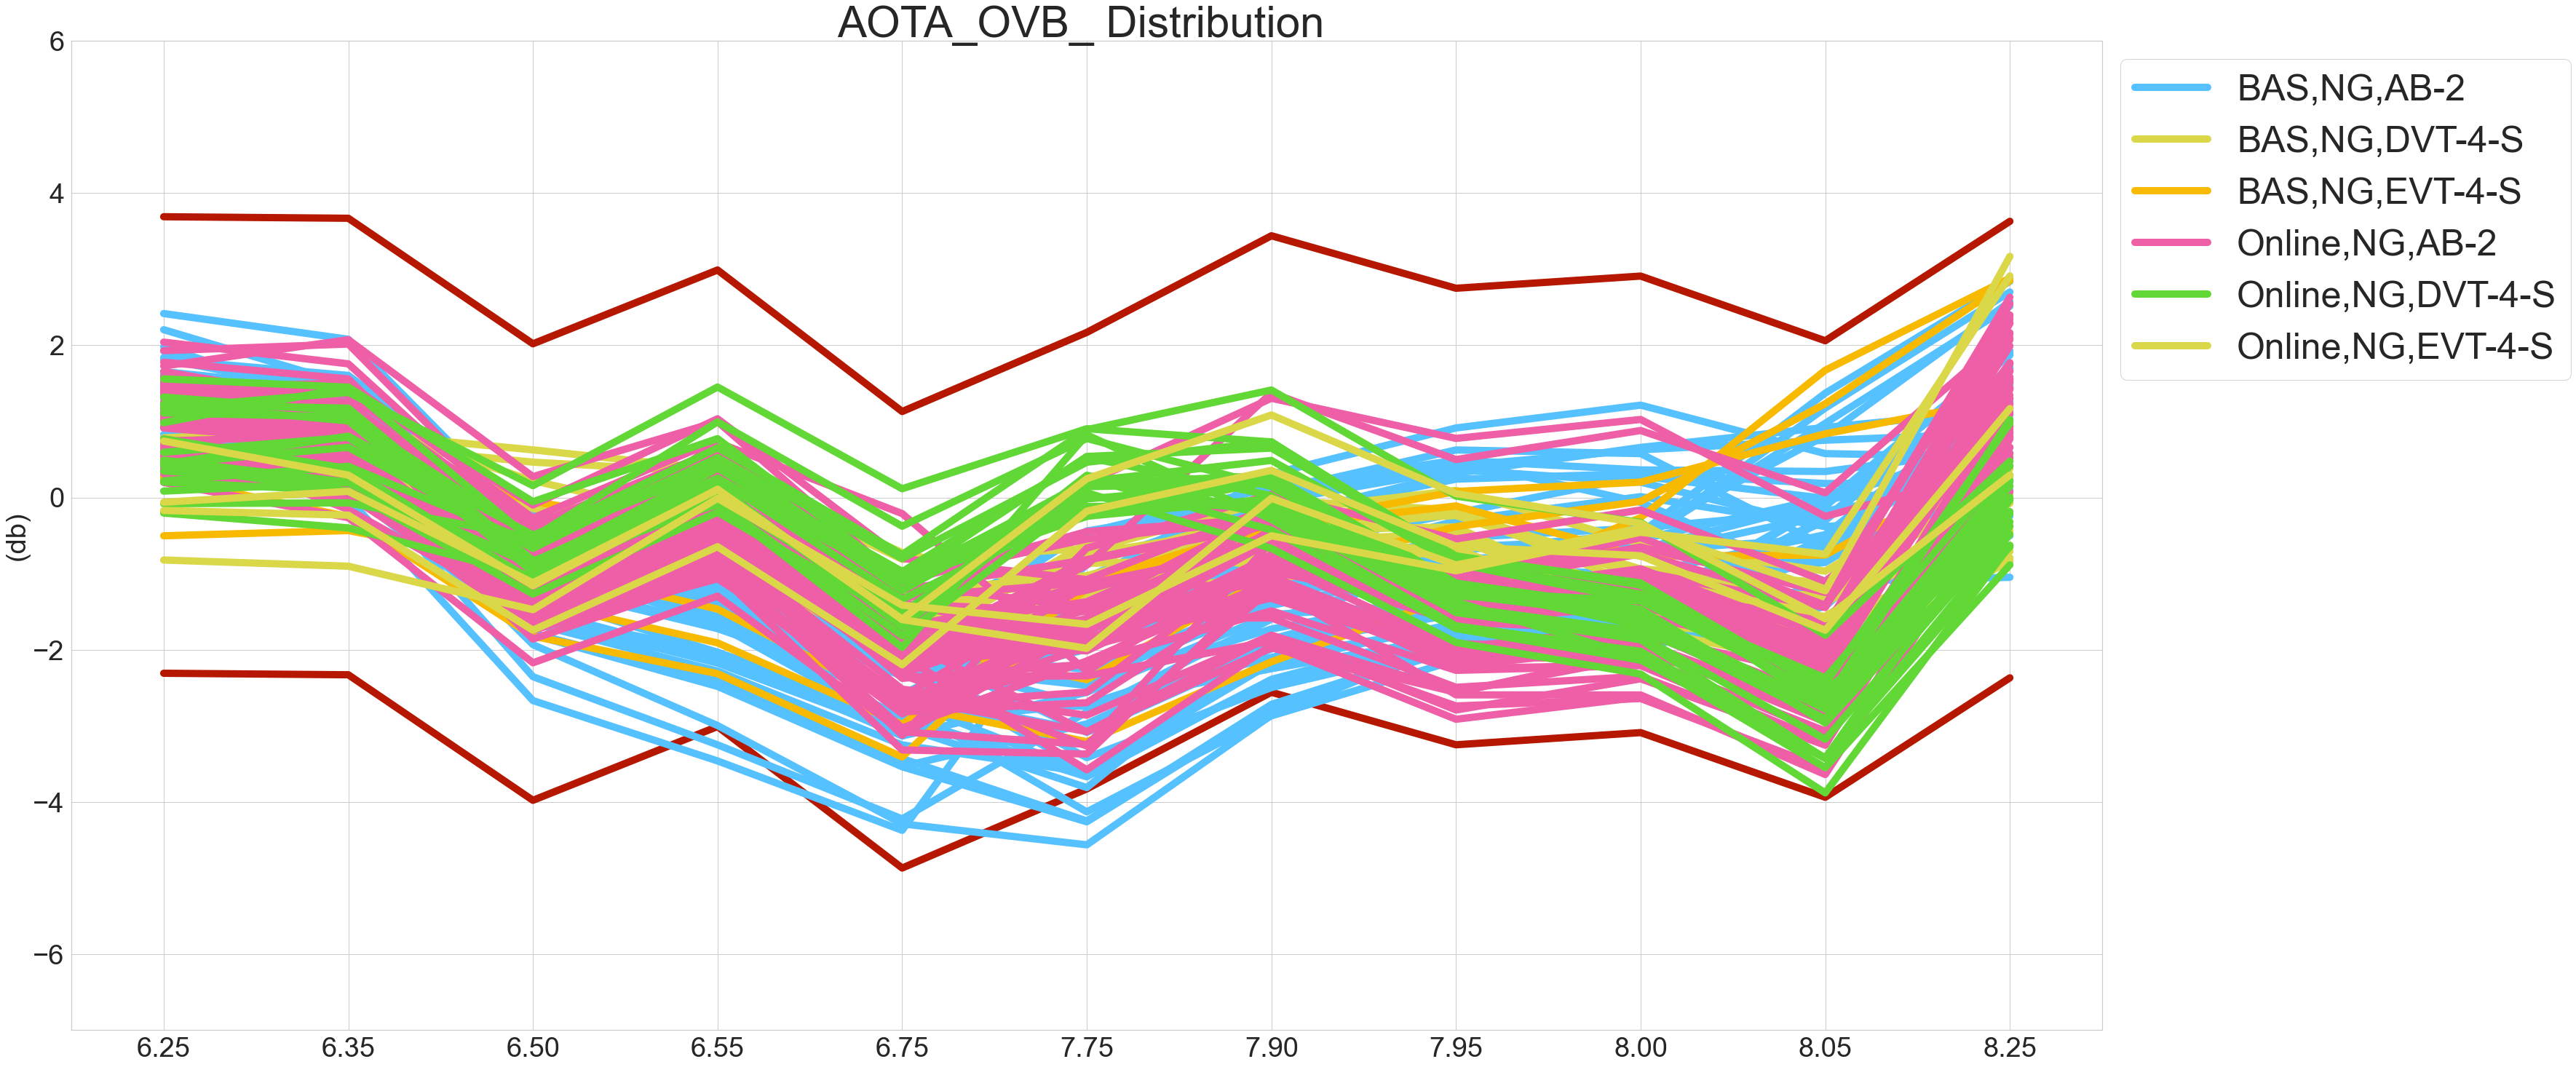

In [36]:
plt.figure(figsize=(50,25))
sns.set(style='whitegrid')
index=0

custom_lines=[]
custom_labels=[]


for i in Spec.Catagory_lst:
    Plotout(ddf,Spec.Catagory,i,Spec.lineC[0],Spec.lineW)
    print(i)

if Config_Select.Catagory_lst!=['']:
    
    for i,value in enumerate(Config_Select.Catagory_lst):

        Plotout(ddf,Config_Select.Catagory,value,Config_Select.lineC[index],Config_Select.lineW)

        custom_lines.append(Line2D([0], [0], color=Config_Select.lineC[index], lw=10))
        custom_labels.append(Config_Select.Catagory_lst[i])
        
        print(value,i,index,Config_Select.lineC[index])
        
        index+=1

try:
        
    if BMCONFIG_Select.Catagory_lst!=['']:

        for i,value in enumerate(BMCONFIG_Select.Catagory_lst):
            
            Plotout(ddf,BMCONFIG_Select.Catagory,value,BMCONFIG_Select.lineC[index],BMCONFIG_Select.lineW)

            custom_lines.append(Line2D([0], [0], color=BMCONFIG_Select.lineC[index], lw=10))
            custom_labels.append(BMCONFIG_Select.Catagory_lst[i])  
            
            print(value,i,index,BMCONFIG_Select.lineC[index])
            
            index+=1
except:
    print('')

        
if SN_Select.Catagory_lst!=['']:
    index=0

    for i in SN_Select.Catagory_lst:
        Plotout(ddf,SN_Select.Catagory,i,SN_Select.lineC[0],SN_Select.lineW)
        index+=1
        print(i)
    for i,value in enumerate(SN_Select.Catagory_lst):
        custom_lines.append(Line2D([0], [0], color=SN_Select.lineC[0], lw=20))
        custom_labels.append(SN_Select.Catagory_lst[i])  
#plt.ylim(5, 20)
plt.ylim(-7, 6)
#plt.ylim(-0.01,0.21)

Plot_Setting(Plot_type,' Distribution ')



# 使用 plt.legend() 函数自定义图例
if Plot_type=="8":
    plt.legend(handles=custom_lines, labels=custom_labels, title='',fontsize=50, loc='upper left')
else:
    plt.legend(handles=custom_lines, labels=custom_labels, title='',fontsize=50, bbox_to_anchor=(1, 1)) 
#,bbox_to_anchor=(1, 1)) ,loc='upper right'   #
    

BAS,NG,AB-2 #56C1FF
BAS,NG,DVT-4-S #DAD749
BAS,NG,EVT-4-S #F8BA00
Online,NG,AB-2 #EF5FA7
Online,NG,DVT-4-S #61D836
Online,NG,EVT-4-S #DAD749


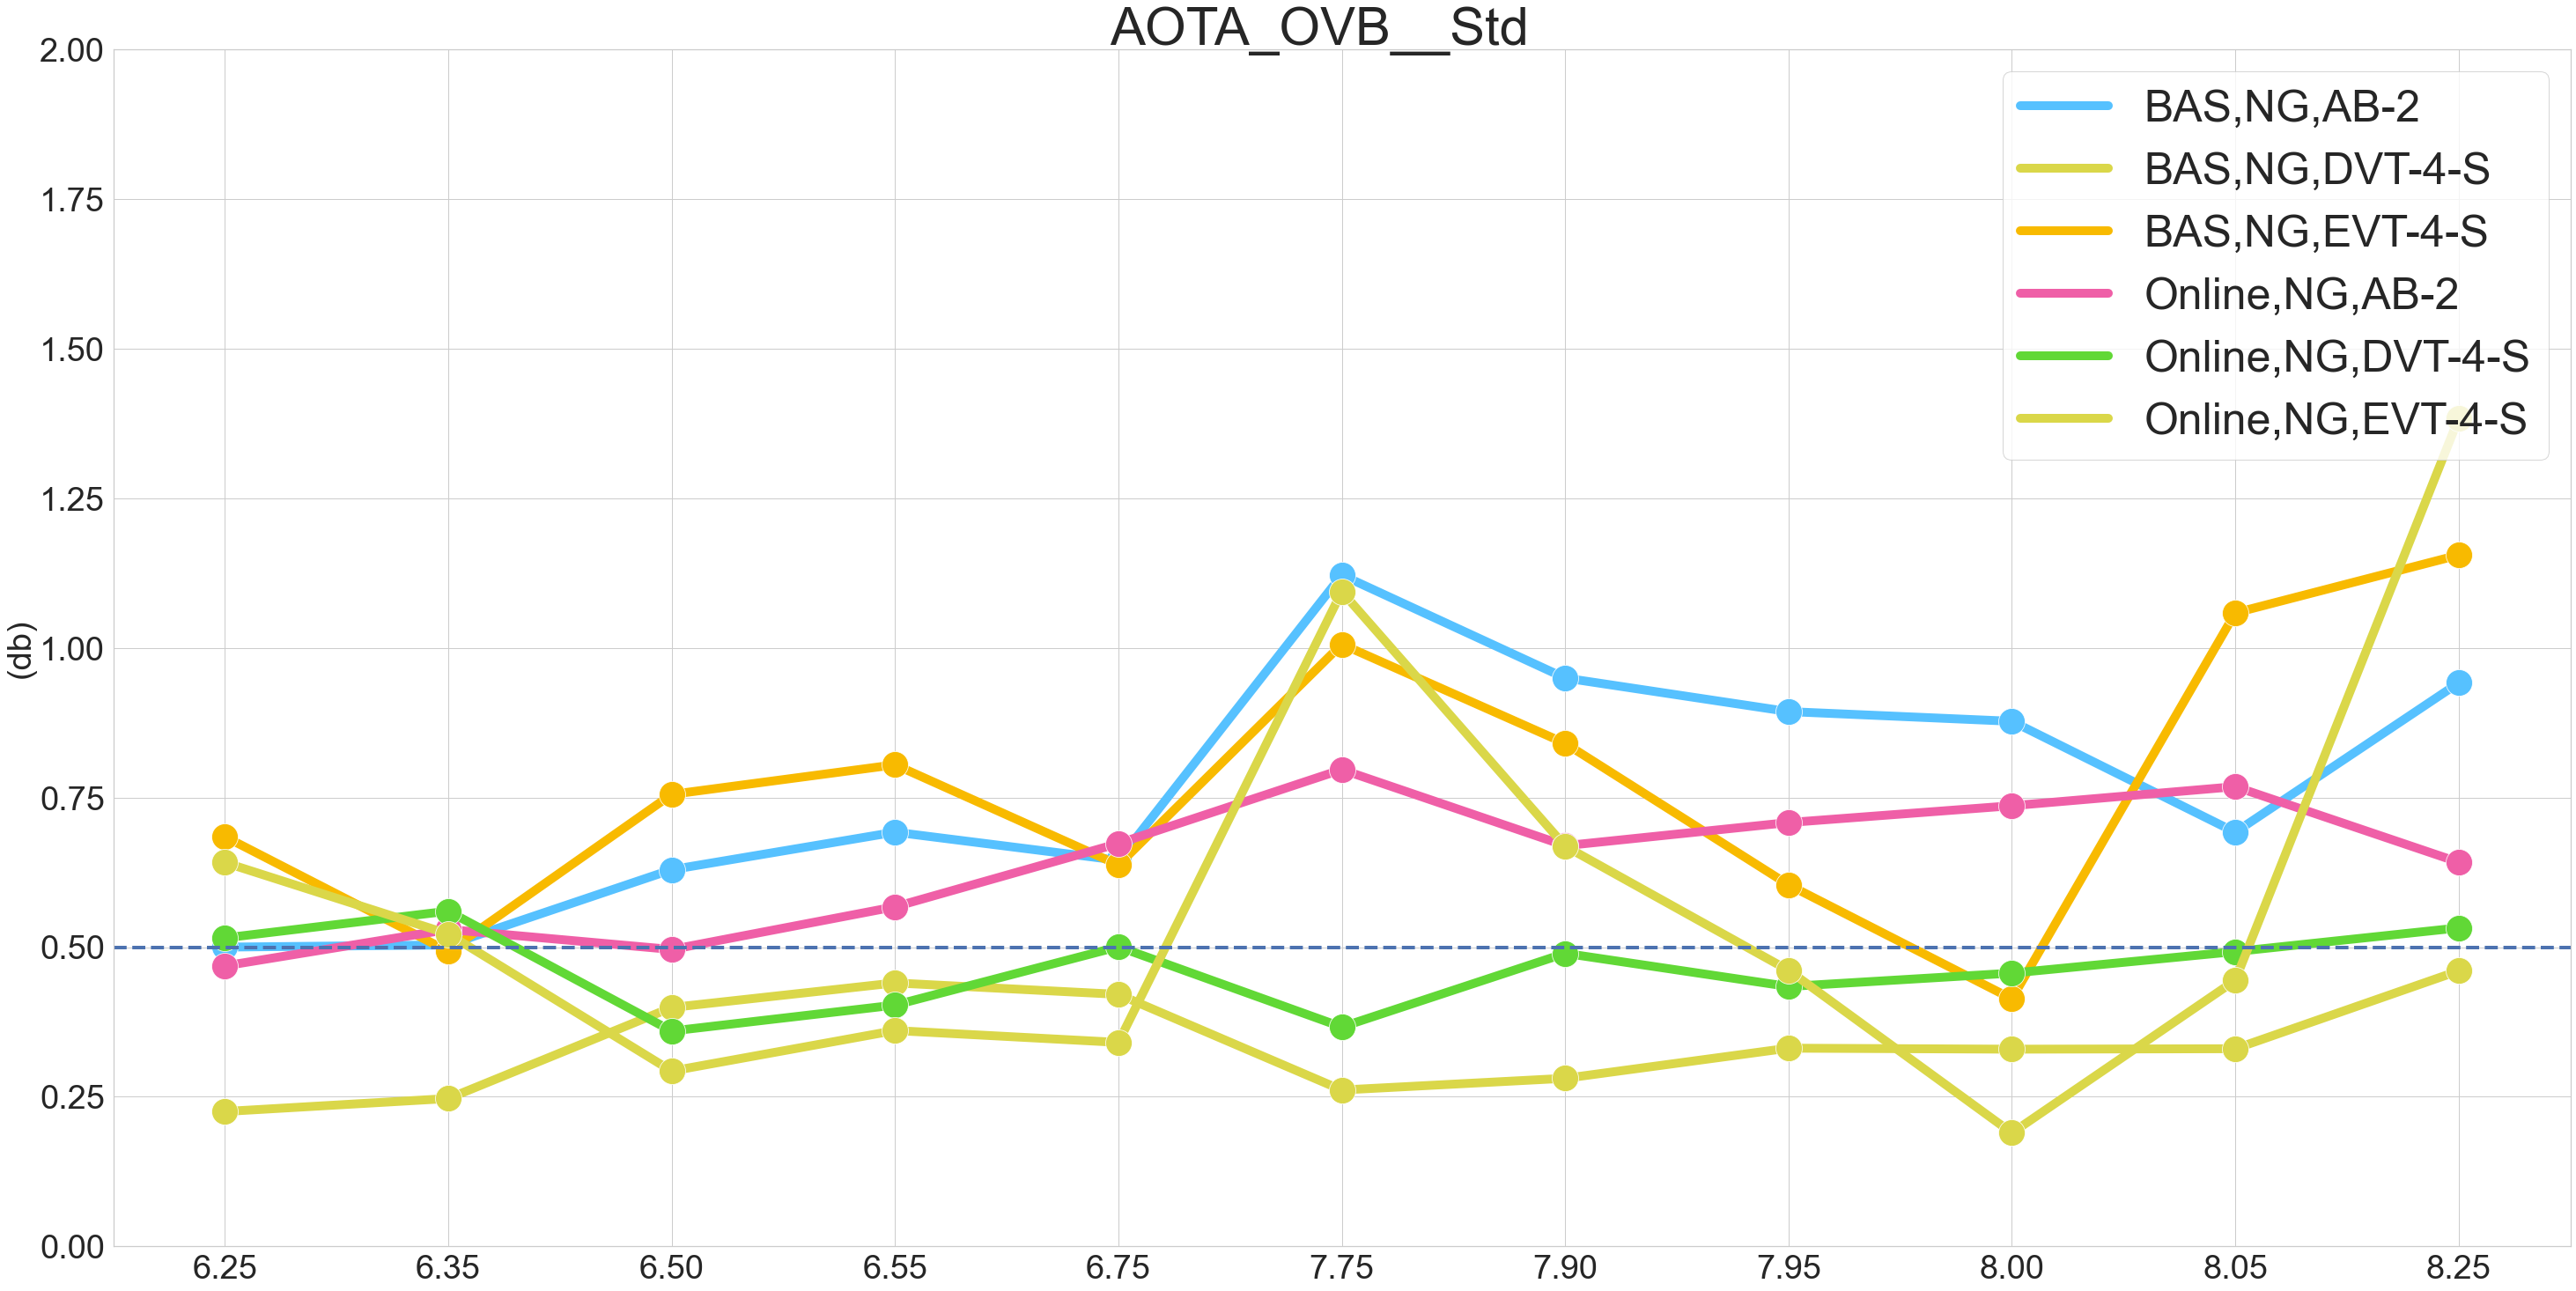

In [37]:
plt.figure(figsize=(50,25))
sns.set(style='whitegrid')
index=0

if Config_Select.Catagory_lst!=['']:

    for i in Config_Select.Catagory_lst:
        
        std_df=ddf[ddf["Config"]==i][["Config"]+test_list]

        for j in std_df:
            try:
                std_df[j]=std_df[j].apply(lambda r:float(r))
            except:
                continue
        
        w=sns.lineplot(data=std_df.std(),marker='o',linewidth=10,markersize=30,color=Config_Select.lineC[index])
        print(i,Config_Select.lineC[index])
        index+=1
try:
    if BMCONFIG_Select.Catagory_lst!=['']:

        for i in BMCONFIG_Select.Catagory_lst:

            std_df=ddf[ddf["BUILD_MATRIX_CONFIG"]==i][["BUILD_MATRIX_CONFIG"]+test_list]

            for j in std_df:
                try:
                    std_df[j]=std_df[j].apply(lambda r:float(r))
                except:
                    continue

            w=sns.lineplot(data=std_df.std(),marker='o',linewidth=10,markersize=30,color=BMCONFIG_Select.lineC[index])
            print(i,BMCONFIG_Select.lineC[index])
            index+=1
except:
    print('')
         
w.axhline(0.5, ls='--', color="b",lw=4,xmin=0, xmax=1)
w.set(ylim=(0,2))
    
plt.legend(handles=custom_lines, labels=custom_labels, title='', loc='upper right',fontsize=50)#,bbox_to_anchor=(1, -0.05))    
Plot_Setting(Plot_type,'_Std   ')

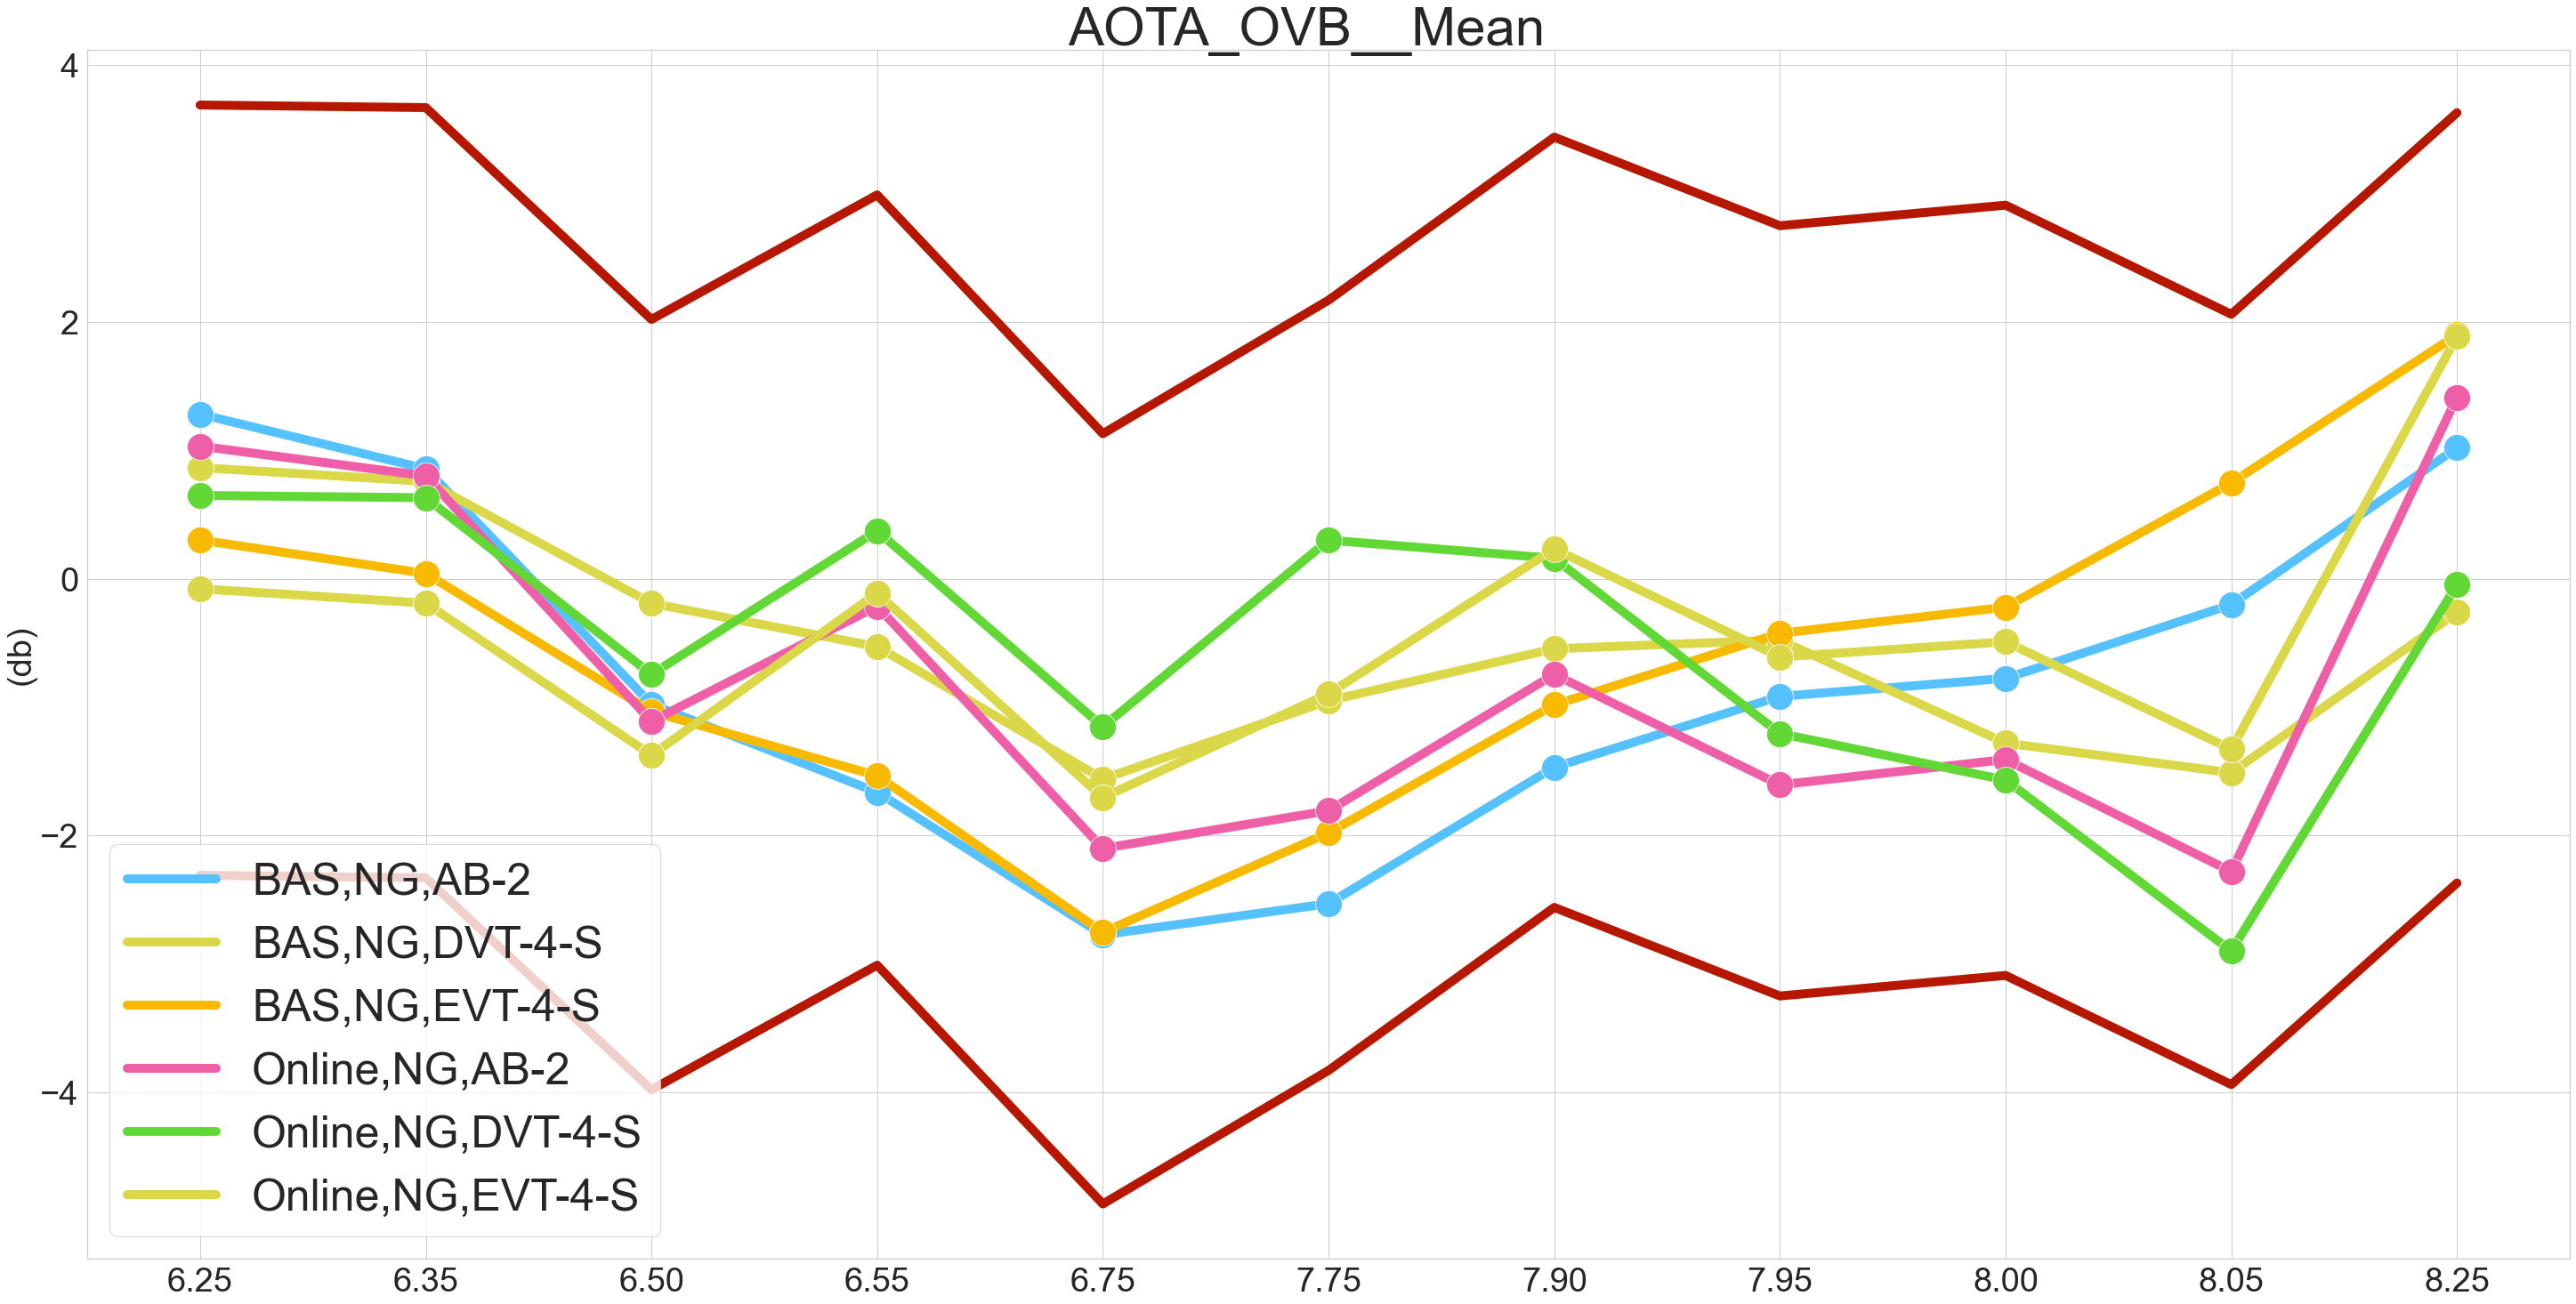

In [38]:
plt.figure(figsize=(50,25))
sns.set(style='whitegrid')
index=0

for i in Spec.Catagory_lst:
    Plotout(ddf,Spec.Catagory,i,Spec.lineC[0],Spec.lineW)

if Config_Select.Catagory_lst!=['']:

    for i in Config_Select.Catagory_lst:
        
        std_df=ddf[ddf["Config"]==i][["Config"]+test_list]

        for j in std_df:
            try:
                std_df[j]=std_df[j].apply(lambda r:float(r))
            except:
                continue
        
        w=sns.lineplot(data=std_df.mean(),marker='o',linewidth=10,markersize=30,color=Config_Select.lineC[index])
        index+=1

try:
    if BMCONFIG_Select.Catagory_lst!=['']:

        for i in BMCONFIG_Select.Catagory_lst:

            std_df=ddf[ddf["BUILD_MATRIX_CONFIG"]==i][["BUILD_MATRIX_CONFIG"]+test_list]

            for j in std_df:
                try:
                    std_df[j]=std_df[j].apply(lambda r:float(r))
                except:
                    continue

            w=sns.lineplot(data=std_df.mean(),marker='o',linewidth=10,markersize=30,color=BMCONFIG_Select.lineC[index])
            index+=1
except:
    print("")

    
plt.legend(handles=custom_lines, labels=custom_labels, title='',fontsize=50)#,bbox_to_anchor=(1, -0.05)), loc='upper left'
Plot_Setting(Plot_type,'_Mean   ')

In [39]:
print('Config qty:\n')
for i in c_list:
    print(i, ddf['Config'].to_list().count(i))

Config qty:

BAS,NG,AB-2 0
Online,NG,AB-2 0
BAS,NG,EVT-4-S 0
Online,NG,DVT-4-S 0
BAS,NG,DVT-4-S 0
Online,NG,EVT-4-S 0
